In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import SimPEG as simpeg
import simpegMT as simpegmt
from scipy.constants import mu_0

def omega(freq):
    """Change frequency to angular frequency, omega"""
    return 2.*np.pi*freq

In [115]:
#Define the mesh
z = 100.
hz = [(z,5,-1.5),(z,10),(z,5,1.5)]
M = simpeg.Mesh.TensorMesh([hz],'C')
# sig = np.zeros(M.nC) + 1e-8
conds = [1,1e-2]
elev = 300
sig = np.zeros(M.nC) + conds[1]
sig[np.logical_and(M.gridCC>-200,M.gridCC<0)] = conds[0]
sig[M.gridCC>elev] = 1e-8
sig[M.gridCC<-500] = 1e-1
sig[M.gridCC<-900] = conds[1]

In [116]:
M.vectorNx

array([-2478.125, -1718.75 , -1212.5  ,  -875.   ,  -650.   ,  -500.   ,
        -400.   ,  -300.   ,  -200.   ,  -100.   ,     0.   ,   100.   ,
         200.   ,   300.   ,   400.   ,   500.   ,   650.   ,   875.   ,
        1212.5  ,  1718.75 ,  2478.125])

In [141]:

# Calculate the analytic fields
freqs = np.logspace(4,-4,33)
Zana = []
for freq in freqs:
    Ed, Eu, Hd, Hu = simpegmt.Utils.getEHfields(M,sig,freq,np.array([elev]))
    Zana.append((Ed + Eu)/(Hd + Hu))
ZanaArr = np.concatenate(Zana)

In [169]:
# Calculate the synthetic solution
Zsyn = []    
Qex = M.getInterpolationMat(np.array([elev]),'Ex')
Qfx = M.getInterpolationMat(np.array([elev]),'Fx')
for freq in freqs:
    e = simpegmt.Utils.get1DEfields(M,sig,freq,sourceAmp=None)
    h = -(M.nodalGrad*e)/(1j*omega(freq)*mu_0)
    Zsyn.append((Qfx*e).conj()/(Qex*h).conj())
ZsynArr = np.concatenate(Zsyn)

In [170]:
np.where(freqs==10)

(array([12]),)

In [183]:
print ZsynArr[-1]
print (Qfx*e).conj(), (Qex*h).conj()

(0.000197894493906+0.000181285727378j)
[ 1.00551946+0.00563967j] [ 2776.87342066-2515.31936068j]


In [171]:
def appResPhs(freq,z):
    app_res = ((1./(8e-7*np.pi**2))/freq)*np.abs(z)**2
    app_phs = np.arctan2(z.imag,z.real)*(180/np.pi)
    return app_res, app_phs
appAna_r, appAna_p = appResPhs(freqs,ZanaArr)

In [172]:
print appAna_r
print appAna_p

[  99.9982606   100.03796243   99.63440411   99.33759941  106.29388449
  120.23667968  122.60558712  101.23963102   70.5016044    45.28589223
   28.43953028   17.6198611    10.84432222    6.83742416    4.62137881
    3.61487549    3.53761463    4.30735297    5.99370277    8.77556001
   12.87536967   18.46051811   25.52731592   33.81862185   42.83565417
   51.95659295   60.60094607   68.35309357   75.00153541   80.50894752
   84.9530758    88.47009307   91.21391269]
[ 44.9980325   45.00483104  45.04645859  44.4151918   43.72907936
  46.72033941  54.60169587  63.94626768  71.19189243  75.42083811
  77.37907592  77.73640994  76.058035    71.73541117  64.19535734
  53.36978096  41.16658711  30.81763511  24.08982259  20.77904552
  19.99288987  20.90312313  22.8822938   25.46014498  28.27778379
  31.06840674  33.65137133  35.92447275  37.84909319  39.43106457
  40.70229309  41.70642543  42.48936455]


In [173]:
appSyn_r, appSyn_p = appResPhs(freqs,ZsynArr)

In [174]:
print appSyn_r
print appSyn_p

[ 148.47846913  175.57907495  170.44187937  154.82139762  151.64437874
  157.04097616  142.11024881  103.42128503   66.07607566   41.13098488
   26.10536117   16.64437152   10.50362449    6.72485409    4.58294174
    3.60236081    3.53787296    4.31623649    6.00810219    8.793518
   12.8970497    18.48663881   25.55782824   33.85235462   42.87059902
   51.99052864   60.6320452    68.38024378   75.02434148   80.52754625
   84.96791113   88.48173456   91.22293906]
[ 24.90447028  35.50740917  43.45028334  46.88513715  48.17221695
  52.65990261  61.40691455  69.96355574  75.14671736  77.09349558
  77.37322373  76.95784679  75.19022669  71.03384758  63.68398281
  53.00055411  40.91266512  30.67116253  24.02349762  20.75523371
  19.98819197  20.90730695  22.89080611  25.4705669   28.28863141
  31.07873966  33.66064252  35.93243359  37.85570553  39.43641995
  40.70654829  41.709758    42.49194635]


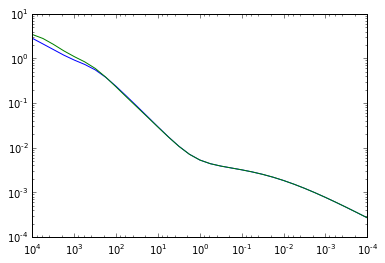

In [175]:
loglog(freqs,np.abs(ZanaArr),freqs,np.abs(ZsynArr))
gca().invert_xaxis()

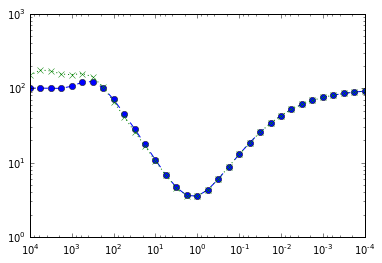

In [176]:
loglog(freqs,appAna_r,'bo--',freqs,appSyn_r,'gx:')
gca().invert_xaxis()

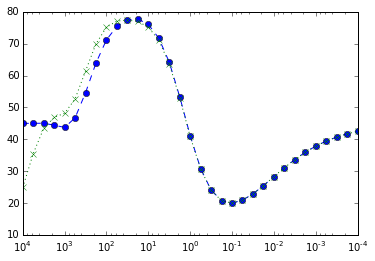

In [177]:
semilogx(freqs,appAna_p,'bo--',freqs,appSyn_p,'gx:')
gca().invert_xaxis()